In [2]:
POWER_DIR='/home/nsultana'

In [3]:
import pandas as pd
import numpy as np

try:
    from Memoizer import memoize_to_folder
    memo = lambda x : memoize_to_folder('memo')(x)
except:
    memo = lambda x : x
        

In [4]:
import os
def read_power(num):
    fname = os.path.join(POWER_DIR, 'power_%d.out' % num)
    df = pd.read_csv(fname, sep=' ', error_bad_lines=False, header=None,
                     names=['date', 'time', 'device', 'ip', 'power'],
                     parse_dates=[[0,1]], infer_datetime_format=True)
    df.power = pd.to_numeric(df.power, errors='coerce')
    df = df[~df.power.isna()]
    print("Read %d power values" % len(df))
    return df

def diffs_only(df):
    df = df.copy()
    df = df[df.power.diff() != 0]
    print("Reduced to %d power values" % len(df))
    return df

@memo
def read_power_diffs(num):
    return diffs_only(read_power(num))

def read_all_power_diffs(n):
    out = []
    for num in range(n):
        out.append(read_power_diffs(num))
    return out

In [5]:
pdiffs = read_all_power_diffs(8)

Loading from memo/read_power_diffs__num-0.pickle
:: Cached stdout:
 :: Read 2472016 power values :: 
 :: Reduced to 355303 power values :: 

Loading from memo/read_power_diffs__num-1.pickle
:: Cached stdout:
 :: Read 2468679 power values :: 
 :: Reduced to 416269 power values :: 

Loading from memo/read_power_diffs__num-2.pickle
:: Cached stdout:
 :: Read 2467473 power values :: 
 :: Reduced to 391155 power values :: 

Loading from memo/read_power_diffs__num-3.pickle
:: Cached stdout:
 :: Read 2158751 power values :: 
 :: Reduced to 1 power values :: 

Loading from memo/read_power_diffs__num-4.pickle
:: Cached stdout:
 :: Read 2458522 power values :: 
 :: Reduced to 410127 power values :: 

Loading from memo/read_power_diffs__num-5.pickle
:: Cached stdout:
 :: Read 2997430 power values :: 
 :: Reduced to 1 power values :: 

Loading from memo/read_power_diffs__num-6.pickle
:: Cached stdout:
 :: Read 2460029 power values :: 
 :: Reduced to 391461 power values :: 

Loading from memo/read_

<IPython.core.display.Javascript object>


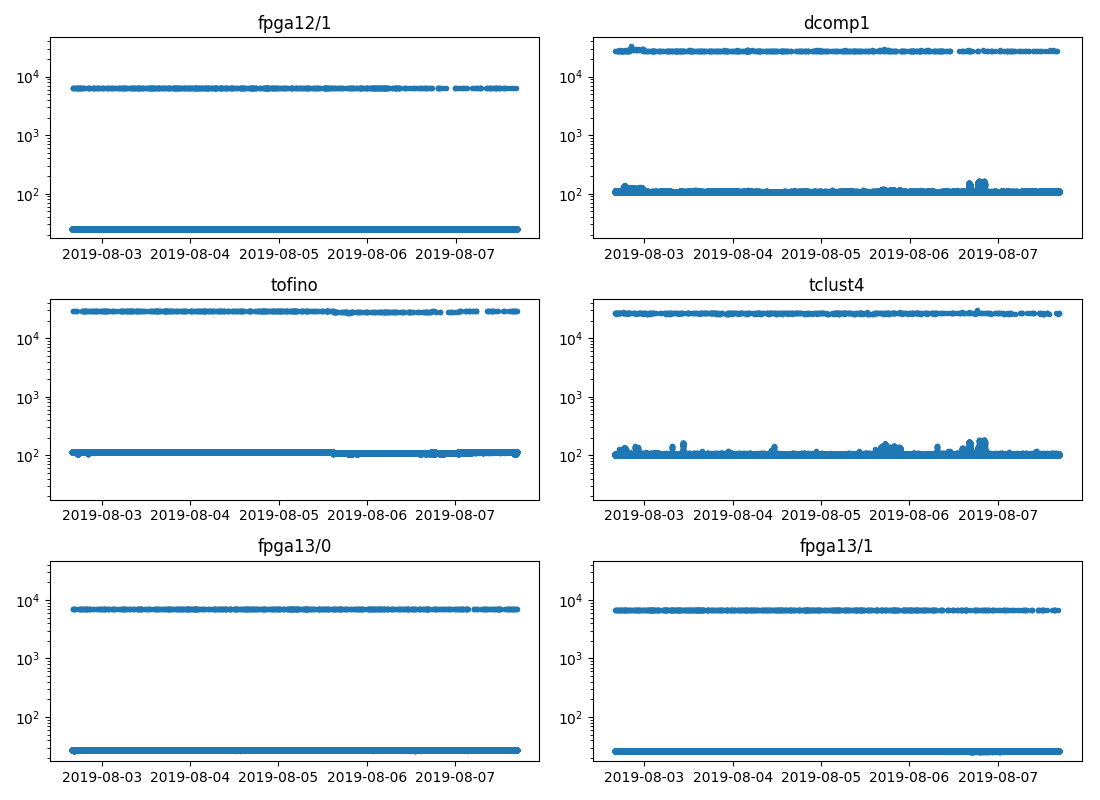

In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.figure(figsize=(11,8))
ax = plt.subplot(3,2,1)

non_empty = [x for x in pdiffs if x.device[0] not in ('tclust2', 'fpga12/2')]

for i, df in enumerate(non_empty, 1):
    plt.subplot(3,2,i, sharey=ax)
    plt.plot_date(df.date_time, df.power, '.')
    plt.title(df.device[0])
    plt.yscale('log')
plt.tight_layout()

In [33]:
def show_low_high_time(df):
    low_diffs = df.date_time.diff()[df.power < 1e3]
    high_diffs = df.date_time.diff()[df.power > 1e3]
    print("%s  \tlow:%s\thigh:%s" % (df.device[0], low_diffs[1:].sum(), high_diffs[1:].sum()))

In [36]:
for df in non_empty:
    show_low_high_time(df)

fpga12/1  	low:5 days 00:22:41.827121	high:0 days 00:13:31.405940
dcomp1  	low:5 days 00:26:53.803394	high:0 days 00:10:16.563978
tofino  	low:5 days 00:27:18.192692	high:0 days 00:10:49.706233
tclust4  	low:5 days 00:29:21.891021	high:0 days 00:10:32.768530
fpga13/0  	low:5 days 00:29:11.595790	high:0 days 00:12:50.350288
fpga13/1  	low:5 days 00:27:57.042043	high:0 days 00:15:03.199085
